<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-5--predicting-future-friendships/01_graph_theory_and_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##An introduction to graph theory and network analysis

Network theory is the study of connections between objects. These objects can be
anything: 

* people connected by relationships, 
* web pages connected by web links, or
* cities connected by roads. 

A collection of objects and their dispersed connections is
called either a network or a graph, depending on whom you ask. 

Engineers prefer to use the term network, while mathematicians prefer graph.

Graphs are simple abstractions that
capture the complexity of our entangled, interconnected world. 

Properties of graphs
remain surprisingly consistent across systems in society and nature.

Graph theory is a
framework for mathematically tracking these consistencies. It combines ideas from diverse branches of mathematics, including probability theory and matrix analysis.

These ideas can be used to gain useful real-world insights ranging from:

* search engine page rankings 
* social circle clustering

So some knowledge of graph theory is indispensable to doing good data science.

##Setup

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import re
import glob
import time
import numpy as np
import pandas as pd

import networkx as nx

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

##Ranking websites by popularity

Suppose you wish to estimate the most popular data science website using
data that is publicly available. This precludes privately tracked traffic data. 

What should you do? 

Network theory offers us a simple way of ranking websites based on
their public links.

To see how, let’s build a simple network composed of two data science
websites: a NumPy tutorial and a SciPy tutorial. 

In graph theory, these websites
are referred to as the nodes in the graph.

Nodes are network points that can form connections
with each other; these connections are called edges.

In [ ]:
# Defining a node list
nodes = ["Numpy", "SciPy"]

In [ ]:
# Defining an edge list
edges = [(1, 0)]  # pointing SciPy to Numpy

In [ ]:
# Checking for the existence of an edge
def edge_exists(i, j):
  return (i, j) in edges

assert edge_exists(1, 0)
assert not edge_exists(0, 1)

In [ ]:
# Tracking nodes and edges using a matrix
adjacency_matrix = np.zeros((len(nodes), len(nodes)))

for i, j in edges:
  adjacency_matrix[i][j] = 1

assert adjacency_matrix[1][0]
assert not adjacency_matrix[0][1]

print(adjacency_matrix)

[[0. 0.]
 [1. 0.]]


In [ ]:
# Adding an edge to the adjacency matrix
adjacency_matrix[0][1] = 1  # pointing Numpy to SciPy
print(adjacency_matrix)

[[0. 1.]
 [1. 0.]]


Suppose we wish to expand our website network by adding two more data science sites
that discuss Pandas and Matplotlib. 

Adding them will increase our node count from
two to four, so we need to expand the adjacency matrix dimensions from two-by-two to four-by-four.

Unfortunately, in NumPy, it’s hard to resize a matrix
while maintaining all existing matrix values—NumPy is not designed to easily handle
growing arrays whose shape is constantly expanding.

Therefore,
NumPy is not the best tool for analyzing expanding networks. 

What should we do?

We need to switch to a different Python library. NetworkX is an external library that
allows for easy network modification. 

It also provides additional useful features, including
network visualization.



##NetworkX

In [ ]:
# Initializing a directed graph object
G = nx.DiGraph()

In [ ]:
# Adding a single node to a graph object
G.add_node(0)
print(nx.to_numpy_array(G))

[[0.]]


In [ ]:
# Adding an attribute to an existing node
def print_node_attributes():
  for i in G.nodes:
    print(f"The attribute dictionary at node {i} is {G.nodes[i]}")

In [ ]:
print_node_attributes()

G.nodes[0]["webpage"] = "NumPy"
print(f"\nWe've added a webpage to node 0")
print_node_attributes()

The attribute dictionary at node 0 is {}

We've added a webpage to node 0
The attribute dictionary at node 0 is {'webpage': 'NumPy'}


In [ ]:
# Adding a node with an attribute
G.add_node(1, webpage="SciPy")
print_node_attributes()

The attribute dictionary at node 0 is {'webpage': 'NumPy'}
The attribute dictionary at node 1 is {'webpage': 'SciPy'}


In [ ]:
# Outputting nodes together with their attributes
print(G.nodes(data=True))

[(0, {'webpage': 'NumPy'}), (1, {'webpage': 'SciPy'})]


In [ ]:
# Adding a single edge to a graph object
G.add_edge(1, 0)
print(nx.to_numpy_array(G))

[[0. 0.]
 [1. 0.]]


From the printed adjacency matrix, we can observe an edge going from Node 1 to
Node 0. 

Unfortunately, our matrix printouts will grow cumbersome as other nodes are
added.

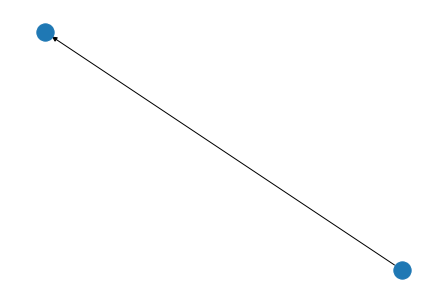

In [ ]:
# Plotting a graph object
np.random.seed(0)

nx.draw(G)
plt.show()

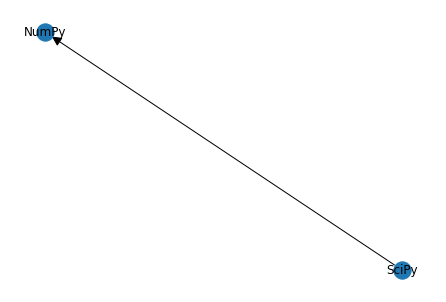

In [ ]:
# Tweaking the graph visualization
np.random.seed(0)

labels = {i: G.nodes[i]["webpage"] for i in G.nodes}
nx.draw(G, labels=labels, arrowsize=20)
plt.show()

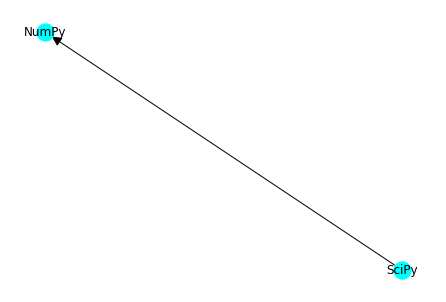

In [ ]:
# Altering the node color
np.random.seed(0)

nx.draw(G, labels=labels, arrowsize=20, node_color="cyan")
plt.show()

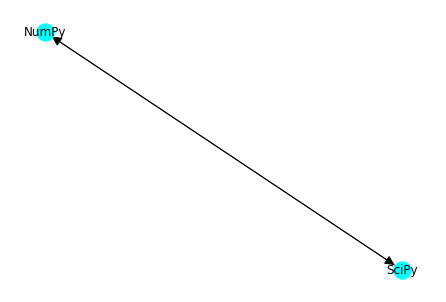

In [ ]:
# Adding a back-link between web pages
np.random.seed(0)

G.add_edge(0, 1)
nx.draw(G, labels=labels, arrowsize=20, node_color="cyan")
plt.show()

We are now ready to expand our network by adding two more web pages: Pandas
and Matplotlib.

In [ ]:
# Adding multiple nodes to a graph object
webpages = ["Pandas", "Matplotlib"]
new_nodes = [(i, {"webpage": webpage}) for i, webpage in enumerate(webpages, 2)]
G.add_nodes_from(new_nodes)

print(f"We've added these nodes to our graph: \n{new_nodes}")
print('\nOur updated list of nodes is:')
print(G.nodes(data=True))

We've added these nodes to our graph: 
[(2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]

Our updated list of nodes is:
[(0, {'webpage': 'NumPy'}), (1, {'webpage': 'SciPy'}), (2, {'webpage': 'Pandas'}), (3, {'webpage': 'Matplotlib'})]


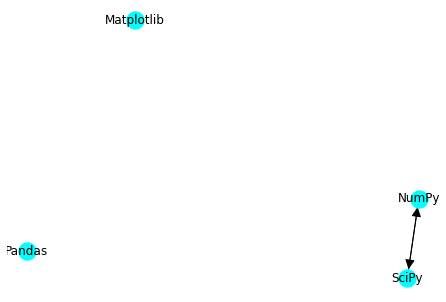

In [ ]:
# Plotting the updated four-node graph
np.random.seed(0)

labels = {i: G.nodes[i]["webpage"] for i in G.nodes}
G.add_edge(0, 1)
nx.draw(G, labels=labels, arrowsize=20, node_color="cyan")
plt.show()

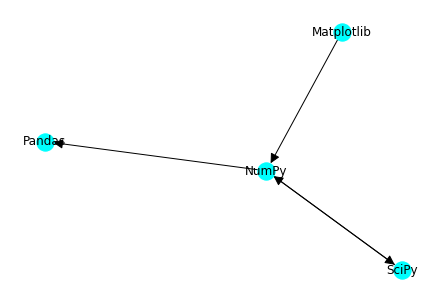

In [ ]:
# Adding multiple edges to a graph object
np.random.seed(0)

G.add_edges_from([(0, 2), (3, 0)])
nx.draw(G, labels=labels, arrowsize=20, node_color="cyan")
plt.show()

We’ve basically developed a
simple metric for ranking websites on the internet. That metric equals the number of
inbound edges pointing toward the site, also known as the in-degree. 

This is the opposite
of the out-degree, which equals the number of edges pointing away from a site.

In [ ]:
# Printing the updated adjacency matrix
adjacency_matrix = nx.to_numpy_array(G)
print(adjacency_matrix)

[[0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]


The
total number of inbound edges equals the number of ones in that column.

Therefore, the sum of values in the column is equal to the node’s in-degree.

In [ ]:
# Computing in-degrees using the adjacency matrix
in_degrees = adjacency_matrix.sum(axis=0)
for i, in_degree in enumerate(in_degrees):
  page = G.nodes[i]["webpage"]
  print(f"{page} has an in-degree of {in_degree}")

top_page = G.nodes[in_degrees.argmax()]["webpage"]
print(f"\n{top_page} is the most popular page.")

NumPy has an in-degree of 2.0
SciPy has an in-degree of 1.0
Pandas has an in-degree of 1.0
Matplotlib has an in-degree of 0.0

NumPy is the most popular page.


In [ ]:
# Computing in-degrees using NetworkX
assert G.in_degree(0) == 2

In [ ]:
# Using strings as node IDs in a graph
G2 = nx.DiGraph()
G2.add_nodes_from(["NumPy", "SciPy", "Matplotlib", "Pandas"])
G2.add_edges_from([
  ("SciPy", "NumPy"), ("NumPy", "SciPy"), ("NumPy", "Pandas"), ("Matplotlib", "NumPy")
])

assert G2.in_degree("NumPy") == 2

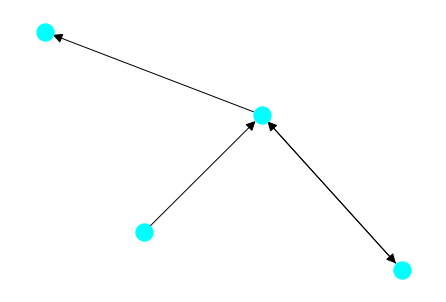

In [ ]:
np.random.seed(0)

nx.draw(G2, arrowsize=20, node_color="cyan")
plt.show()

Commonly,
when dealing with graph data, data scientists are provided with two files: one containing
all the node attributes and another containing the linkage information.

For
instance, in this case study, we are provided with a table of FriendHook profiles as well
as a table of existing friendships. These friendships serve as edges, which can be
loaded by calling `add_edges_from`. 

Meanwhile, the profile information depicts attributes
of each user in the friendship graph. After proper preparation, the profiles can
be mapped back to the nodes by calling `add_nodes_from`.

What if, instead, we treated every edge as though it were a two-way street? 

Our edges
would be undirected, and we’d obtain an undirected graph. 

In an undirected graph, we
can traverse connected nodes in either direction.

##Optimize the travel time between towns

In business logistics, product delivery time can impact certain critical decisions.

Suppose that a road connects two towns, Town 0 and Town 1. The driving time
between the towns is 20 minutes. 

Let’s record this information in an undirected graph.

In [ ]:
# Creating a two-node undirected graph
G = nx.Graph()
G.add_edge(0, 1)
G[0][1]["travel_time"] = 20

In [ ]:
# Checking the edge attribute of a graph
for i, j in [(0, 1), (1, 0)]:
  travel_time = G[i][j]["travel_time"]
  print(f"It takes {travel_time} minutes to drive from Town {i} to Town {j}.")

It takes 20 minutes to drive from Town 0 to Town 1.
It takes 20 minutes to drive from Town 1 to Town 0.


In our undirected graph, the travel
time between towns is not dependent on direction.

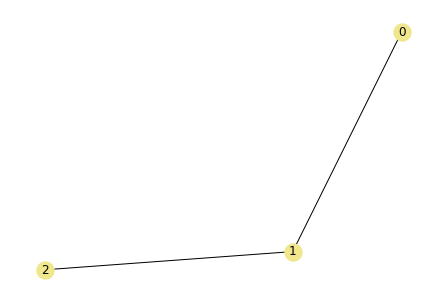

In [ ]:
# Visualizing a path between multiple towns
np.random.seed(0)

G.add_edge(1, 2, travel_time=15)
nx.draw(G, with_labels=True, node_color="khaki")
plt.show()

In [ ]:
# Computing the travel time between towns
travel_time = sum(G[i][1]["travel_time"] for i in [0, 2])
print(f"It takes {travel_time} minutes to drive from Town 0 to Town 2.")

It takes 35 minutes to drive from Town 0 to Town 2.


We’ve computed the fastest travel time between the two towns. Our computation was
trivial since there is just one route between Town 0 and Town 2. 

However, in real life,
many routes can exist between localized towns. Optimizing driving times between
multiple towns is not so simple.

##Modeling a complex network

Let’s build a graph containing
more than a dozen towns spread across multiple counties. In our graph model, the
travel time between towns will increase when towns are in different counties. 

We’ll assume the following:
* Our towns are located in six different counties.
* Each county contains 3 to 10 towns.
* 90% of the towns in a single county are directly connected by roads. The average travel time on a county road is 20 minutes.
* 5% of the towns across different counties are directly connected by a road. The average travel time on an intra-county road is 45 minutes.

We’ll now model this scenario. Then we’ll devise an algorithm to compute the fastest
travel time between any two towns in our complex network.

Let’s start by modeling a single county that contains five towns.

In [ ]:
# Modeling five towns in the same county
G = nx.Graph()
G.add_nodes_from((i, {"county_id": 0}) for i in range(5))

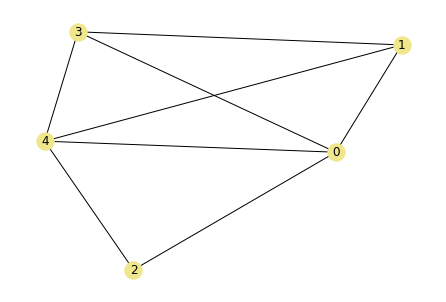

In [ ]:
# Modeling random intra-county roads
np.random.seed(0)

def add_random_edge(G, node1, node2, prob_road=.9, mean_drive_time=20):
  # Flips a coin to determine whether an edge is inserted
  if np.random.binomial(1, prob_road):
    # Chooses the travel time from a normal distribution  
    drive_time = np.random.normal(mean_drive_time)
    G.add_edge(node1, node2, travel_time=round(drive_time, 2))
  
nodes = list(G.nodes())
for node1 in nodes[:-1]:
  for node2 in nodes[node1 + 1:]:
    add_random_edge(G, node1, node2)

nx.draw(G, with_labels=True, node_color="khaki")
plt.show()

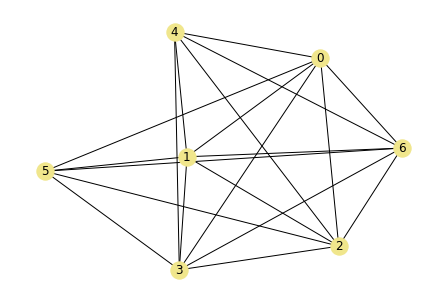

In [ ]:
# Modeling a second random county
np.random.seed(0)

def random_county(county_id):
  # Chooses the number of towns in the county at random from an integer range of 3 to 10
  num_towns = np.random.randint(3, 10)
  G = nx.Graph()
  nodes = [(node_id, {"county_id": county_id}) for node_id in range(num_towns)]
  G.add_nodes_from(nodes)
  for node1, _ in nodes[:-1]:
    for node2, _ in nodes[node1 + 1:]:
      add_random_edge(G, node1, node2)
  return G
  
G2 = random_county(1)
nx.draw(G2, with_labels=True, node_color="khaki")
plt.show()

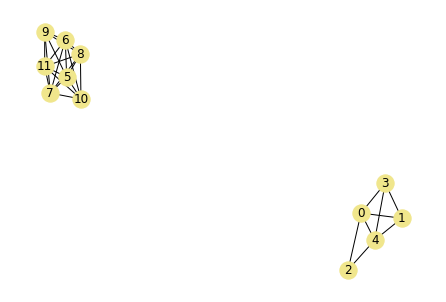

In [ ]:
# Merging two separate graphs
np.random.seed(0)

G = nx.disjoint_union(G, G2)
nx.draw(G, with_labels=True, node_color="khaki")
plt.show()

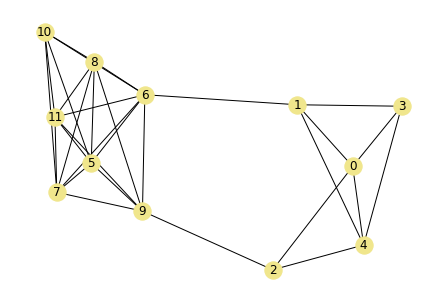

In [ ]:
# Adding random inter-county roads
np.random.seed(0)

def add_intercounty_edges(G):
  nodes = list(G.nodes(data=True))
  # Iterates over every node and Iterates over every node and
  for node1, attributes1 in nodes[:-1]:
    county1 = attributes1["county_id"]
    # Iterates over node pairs that we have not yet compared
    for node2, attributes2 in nodes[node1:]:
      if county1 != attributes2["county_id"]:
        add_random_edge(G, node1, node2, prob_road=0.05, mean_drive_time=45)
  return G

G = add_intercounty_edges(G)
np.random.seed(0)
nx.draw(G, with_labels=True, node_color="khaki")
plt.show()

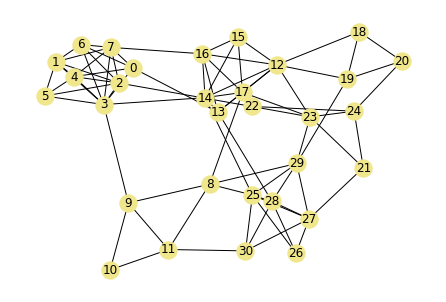

In [ ]:
# Simulating six interconnected counties
np.random.seed(1)

G = random_county(0)
for county_id in range(1, 6):
  G2 = random_county(county_id)
  G = nx.disjoint_union(G, G2) 

G = add_intercounty_edges(G)
np.random.seed(1)
nx.draw(G, with_labels=True, node_color="khaki")
plt.show()

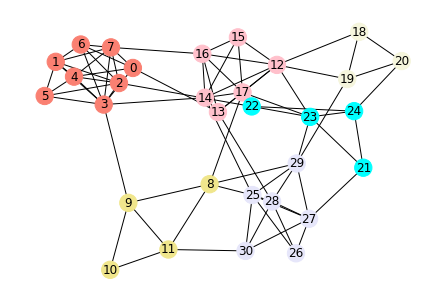

In [ ]:
# Coloring nodes by county
np.random.seed(1)

county_colors = ['salmon', 'khaki', 'pink', 'beige', 'cyan', 'lavender']
county_ids = [G.nodes[n]["county_id"] for n in G.nodes]
node_colors = [county_colors[id_] for id_ in county_ids] 

nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()

##Computing the fastest travel time

Suppose our brewery is located in Town 0 and our potential client is located in Town 30. We want to determine the fastest travel time between Town 0 and Town 30. In the process, we need to compute the fastest travel time between Town 0 and every other town. 

How do we do this?

Initially, all we know is the trivial travel time between Town 0
and itself: 0 minutes.

Let’s record this travel time in a fastest_times dictionary.

In [ ]:
# Tracking the fastest-known travel times
fastest_times = {0: 0}

In [ ]:
# Accessing the neighbors of Town 0
neighbors = list(G.neighbors(0))
assert list(neighbors) == list(G[0])

print(f"The following towns connect directly with Town 0:\n{neighbors}")

The following towns connect directly with Town 0:
[3, 4, 6, 7, 13]


In [ ]:
# Tracking the travel times to neighboring towns
time_to_neighbor = {n: G[0][n]["travel_time"] for n in neighbors}
fastest_times.update(time_to_neighbor)

for neighbor, travel_time in sorted(time_to_neighbor.items(), key=lambda x: x[1]):
  print(f"It takes {travel_time} minutes to drive from Town 0 to Town {neighbor}")

It takes 18.04 minutes to drive from Town 0 to Town 7
It takes 18.4 minutes to drive from Town 0 to Town 3
It takes 18.52 minutes to drive from Town 0 to Town 4
It takes 20.26 minutes to drive from Town 0 to Town 6
It takes 44.75 minutes to drive from Town 0 to Town 13


It takes approximately 45 minutes to drive from Town 0 to Town 13. 

Is this the fastest
travel time between these two towns? 

Not necessarily! A detour through another town
may speed up travel.

In [ ]:
# Searching for faster detours through Town 7
def examine_detour(town_id):
  detour_found = False
  # The travel time between Town 0 and town_id
  travel_time = fastest_times[town_id]
  for n in G[town_id]:
    # The detour time from Town 0 to a neighbor of town_id
    detour_time = travel_time + G[town_id][n]["travel_time"]
    if n in fastest_times:
      # Checks if the detour improved the fastest known travel time from Town 0 to n
      if detour_time < fastest_times[n]:
        detour_found = True
        print(f"A detour through Town {town_id} reduces travel-time to Town {n} from {fastest_times[n]:.2f} to {detour_time:.2f} minutes.")
        fastest_times[n] = detour_time
    else:
      fastest_times[n] = detour_time

In [ ]:
if not examine_detour(7):
  print("No detours were found.")

added_towns = len(fastest_times) - 6
print(f"We've computed travel-times to {added_towns} additional towns.")

No detours were found.
We've computed travel-times to 3 additional towns.


Let’s run these steps to choose our next detour candidate.

In [ ]:
# Selecting an alternative detour candidate
candidate_pool = set(G[0]) | set(G[7])
examined_towns = {0, 7}
# Removes all previously examined towns from the candidate set
unexamined_towns = candidate_pool - examined_towns
# Selects a detour candidate with the fastest known travel time to Town 0
detour_candidate = min(unexamined_towns, key=lambda x: fastest_times[x])
travel_time = fastest_times[detour_candidate]
print(f"Our next detour candidate is Town {detour_candidate}, which is located {travel_time} minutes from Town 0.")

Our next detour candidate is Town 3, which is located 18.4 minutes from Town 0.


In [ ]:
# Searching for faster detours through Town 3
if not examine_detour(detour_candidate):  
  print("No detours were found.")

def new_neighbors(town_id):
  return set(G[town_id]) - examined_towns

def shift_to_examined(town_id):
  unexamined_towns.remove(town_id)
  examined_towns.add(town_id)

No detours were found.


In [ ]:
unexamined_towns.update(new_neighbors(detour_candidate))
shift_to_examined(detour_candidate)
num_candidates = len(unexamined_towns)
print(f"{num_candidates} detour candidates remain.")

9 detour candidates remain.


Once again, no detours were discovered. However, nine detour candidates remain in
our unexaminedTowns set. 

Let’s examine the remaining candidates.

In [ ]:
# Examining every town for faster detours
while unexamined_towns:
  detour_candidate = min(unexamined_towns, key=lambda x: fastest_times[x])
  examine_detour(detour_candidate)
  shift_to_examined(detour_candidate)
  unexamined_towns.update(new_neighbors(detour_candidate))

A detour through Town 14 reduces travel-time to Town 15 from 83.25 to 82.27 minutes.
A detour through Town 22 reduces travel-time to Town 23 from 111.21 to 102.38 minutes.
A detour through Town 28 reduces travel-time to Town 29 from 127.60 to 108.46 minutes.
A detour through Town 28 reduces travel-time to Town 30 from 126.46 to 109.61 minutes.
A detour through Town 19 reduces travel-time to Town 20 from 148.03 to 131.23 minutes.


In [ ]:
# Counting all the towns within a two-hour driving range
close_towns = {town for town, drive_time in fastest_times.items() if drive_time <= 2 * 60}

num_close_towns = len(close_towns)
total_towns = len(G.nodes)
print(f"{num_close_towns} of our {total_towns} towns are within two hours of our brewery.")

29 of our 31 towns are within two hours of our brewery.


All but two of our towns are within two hours of the brewery. We’ve figured this out by
solving the shortest path length problem. The problem applies to graphs whose edges contain
numeric attributes, which are called edge weights. 

Additionally, a sequence of node
transitions in the graph is called a path. Each path traverses a sequence of edges. The
sum of edge weights in that sequence is called the path length.

This shortest path length algorithm is included in NetworkX.

In [ ]:
# Computing shortest path lengths with NetworkX
shortest_lengths = nx.shortest_path_length(G, weight="travel_time", source=0)
for town, path_length in shortest_lengths.items():
  assert fastest_times[town] == path_length

Fortunately, the shortest path length algorithm can be easily modified
to track the shortest path. All we need to do is add a dictionary structure that tracks the
transition between nodes.



In [ ]:
# Computing shortest paths with NetworkX
shortest_path = nx.shortest_path(G, weight="travel_time", source=0)[30]
print(shortest_path)

[0, 13, 28, 30]


In [ ]:
# Verifying the length of a shortest path
travel_time = 0

for i, town_a in enumerate(shortest_path[:-1]):
  town_b = shortest_path[i + 1]
  travel_time += G[town_a][town_b]["travel_time"]

print(f"The fastest travel time between Town 0 and Town 30 is {travel_time} minutes.")
assert fastest_times[30] == travel_time

The fastest travel time between Town 0 and Town 30 is 109.61 minutes.


Basic network theory allows us to optimize the travel paths between geolocations.

